# Introduction

[Original Source Code](https://keras.io/examples/vision/mnist_convnet/)

# Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

softmax:            0.2, 0.5, 0.1, 0.2
categorial (nhan):  0,   0,   1.0, 0
=>       CE loss =  -log(0.1)

# Load Cifar10 data

In [2]:


#KERAS: (N, H, W, C) = (batch-size, height, width, channels)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170508288/170498071 [==============================] - 2s 0us/step


## **Plot Images**

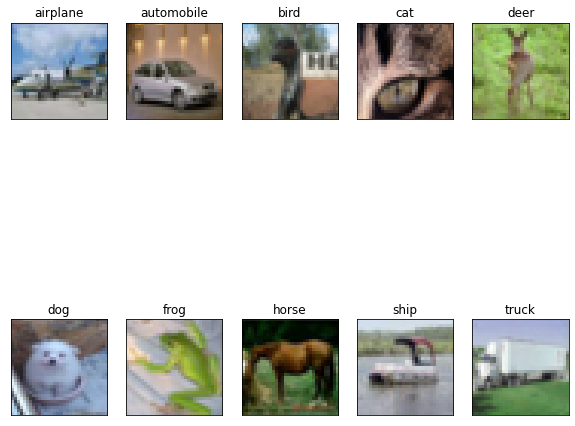

In [3]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,10))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

#Prepare the data

In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape)
print("\n")

# Make sure images have shape (32, 32, 1)
# x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples\n")

# Model / data parameters
num_classes = 10

# convert class vectors to binary class matrices, one hop vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape: ", y_train.shape)
print("y_train[:3, :]: ")
print(y_train[:3, :])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(50000, 32, 32, 3) (50000, 1)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

y_train shape:  (50000, 10)
y_train[:3, :]: 
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Build the model

In [7]:
from tensorflow.keras.layers import BatchNormalization

input_shape = (32, 32, 3)
def define_model():
	model = keras.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
	model.add(BatchNormalization())
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(10, activation='softmax'))
	# compile model
	# opt = SGD(lr=0.001, momentum=0.9)
	#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [8]:
input_shape = (32, 32, 3)
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
# #        layers.Dropout(0.5),
#         layers.Dense(num_classes, activation="softmax"),
#     ]
# )
model = define_model()
model.summary()

# save computational graph to json
graph = model.to_json()
with open("comp_graph.json", "w") as json_file:
    json_file.write(graph)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

# Train the model

In [12]:
batch_size = 128
epochs = 50

#opt = keras.optimizers.Adam(learning_rate=0.001)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy", 
                                                                          tf.keras.metrics.Precision(),
                                                                          tf.keras.metrics.Recall()])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
model.save_weights("model.h5")

Epoch 1/50
352/352 [==============================] - 15s 39ms/step - loss: 1.0290 - accuracy: 0.6311 - precision_2: 0.7590 - recall_2: 0.4989 - val_loss: 1.0170 - val_accuracy: 0.6432 - val_precision_2: 0.7361 - val_recall_2: 0.5394
Epoch 2/50
352/352 [==============================] - 13s 37ms/step - loss: 1.0059 - accuracy: 0.6401 - precision_2: 0.7618 - recall_2: 0.5144 - val_loss: 1.0728 - val_accuracy: 0.6324 - val_precision_2: 0.7266 - val_recall_2: 0.5294
Epoch 3/50
352/352 [==============================] - 13s 37ms/step - loss: 0.9794 - accuracy: 0.6483 - precision_2: 0.7689 - recall_2: 0.5294 - val_loss: 0.9731 - val_accuracy: 0.6554 - val_precision_2: 0.7469 - val_recall_2: 0.5714
Epoch 4/50
352/352 [==============================] - 13s 38ms/step - loss: 0.9509 - accuracy: 0.6585 - precision_2: 0.7747 - recall_2: 0.5428 - val_loss: 0.9009 - val_accuracy: 0.6784 - val_precision_2: 0.7736 - val_recall_2: 0.5924
Epoch 5/50
352/352 [==============================] - 13s 38ms/s

#Plot data

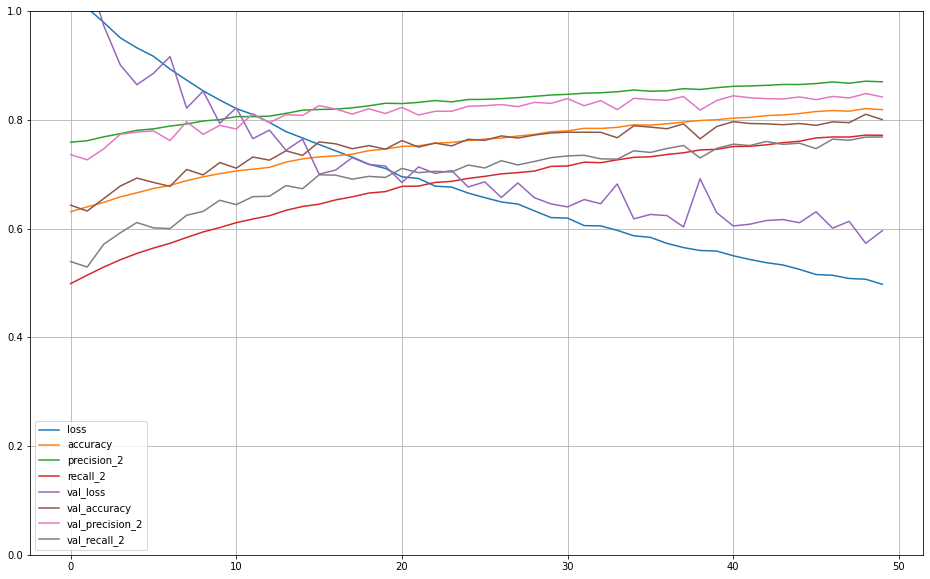

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


# Evaluate the trained model

In [14]:
from keras.models import model_from_json

# load computational graph
json_file = open('comp_graph.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
pretrained_model = model_from_json(loaded_model_json)

# load weights into new model + compile
pretrained_model.load_weights("model.h5")
pretrained_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy", 
                                                                          tf.keras.metrics.Precision(),
                                                                          tf.keras.metrics.Recall()])


score = pretrained_model.evaluate(x_test.squeeze(), y_test, verbose=0)
print("Loss: {:6.2f}, Precision: {:6.2f}%, Recall: {:6.2f}%, Accuracy: {:6.2f}%".format(score[0],score[1]*100, score[2]*100, score[3]*100))


Loss:   0.63, Precision:  78.77%, Recall:  82.94%, Accuracy:  75.58%


#Test Model

Mounted at /content/drive


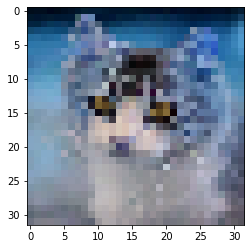

The input imange is: 

frog


In [15]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
image = cv.imread("/content/drive/MyDrive/Learning/Computer Vision/Exercises/cat.jpg")
image = cv.resize(image, (32,32))
plt.imshow(image)
plt.show()
image = image.astype('float32')
image = image.reshape(1, 32, 32, 3)
image = 255-image
image /= 255


pred = model.predict(image, batch_size=1)

print("The input imange is: \n")
print( class_names[np.argmax(pred)])



In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 


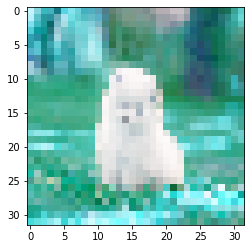

The input imange is: 

cat


In [16]:
image = cv.imread("/content/drive/MyDrive/Learning/Computer Vision/Exercises/dog.jpg")
image = cv.resize(image, (32,32))
plt.imshow(image)
plt.show()
image = image.astype('float32')
image = image.reshape(1, 32, 32, 3)
image = 255-image
image /= 255


pred = model.predict(image, batch_size=1)

print("The input imange is: \n")
print( class_names[np.argmax(pred)])